# La transformada de Fourier

**Objetivo.**
Entender y visualizar qué es lo que se obtiene cuando se aplica la transformada de Fourier a una función $f(t)$
continua.

## Introducción

La transformada de Fourier es una herramienta matemática que facilita el análisis de señales complejas mediante la transformación de la información del dominio del tiempo al dominio de la frecuencia.
Esta herramienta es ampliamente utilizada tanto en la física, en la ingeniería, incluso en la medicina (por ejemplo, en las resonancias magnéticas) y otras áreas más.

In [2]:
#Importamos las librerías que se utilizarán es este tema
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Gráficos en 3D
from IPython.display import display, HTML #Esta es para poder proyectar videos en una celda de Jupiter Notebook
import ipywidgets as widgets

## Definición.

Se define a la transformada de Fourier para una función $f(t)$, donde $t$ es una variable de tiempo, de la siguiente manera:

$$F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-i\omega t}\,dt \tag{1}$$

en donde $\omega$ es la frecuencia angular, y $F(\omega)$ es nuestra función resultante que ahora depende de la frecuencia angular.

De igual manera, también se puede definir una transformada de Fourier inversa, que nos permita descomponer una función dentro del dominio de frecuencias a otra que esté en el dominio del tiempo. Así, definimos a la transformada de Fourier inversa para una función $F(\omega)$ de la siguiente manera:

$$f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} F(\omega)e^{i\omega t}\,d\omega \tag{2}$$

<div class="alert alert-success">

### Ejercicio resuelto

<font color="black">

Calcula la transformada de Fourier de la función
$$f(t) = \cos(\omega_0 t)$$
donde $\omega_0$ es una constante.

### Solución
Para nuestra solución, podemos expresar a la función $\cos(\omega_0 t)$ en términos de exponenciales complejas, es decir:

$$
\cos(\omega_0 t) = \frac{e^{i \omega_0 t} + e^{-i \omega_0 t}}{2}
$$

Y de esta manera sustituirla en nuestra definición $(1)$:

$$F(\omega) = \frac{1}{2}\int_{-\infty}^{\infty}  \left(e^{i \omega_0 t} + e^{-i \omega_0 t}\right)e^{-i \omega t} \, dt
$$

Separando la integral de la suma como la suma de integrales, obtenemos que:

$$
F(\omega) = \frac{1}{2} \left( \int_{-\infty}^{\infty} e^{i (\omega_0 - \omega) t} \, dt + \int_{-\infty}^{\infty} e^{-i (\omega_0 + \omega) t} \, dt \right)
$$

En este punto, podemos aplicar una definición muy importante para este tema. La delta de Dirac $\delta(k)$ está definida como:

$$
\int_{-\infty}^{\infty} e^{i k t} \, dt = 2\pi \delta(k) \tag{3}
$$

Entonces, si aplicamos $(3)$ en nuestro ejercicio obtenemos

$$
F(\omega) = \pi \left[ \delta(\omega - \omega_0) + \delta(\omega + \omega_0) \right]
$$

</font>
</div>

</div>

Primero, para poder visualizar en una primera instancia el significado del resultado del ejercicio anterior, en la siguiente celda se mostrará la elaboración de la gráfica de nuestra señal original dada por $f(t) = \cos(\omega_0 t)$

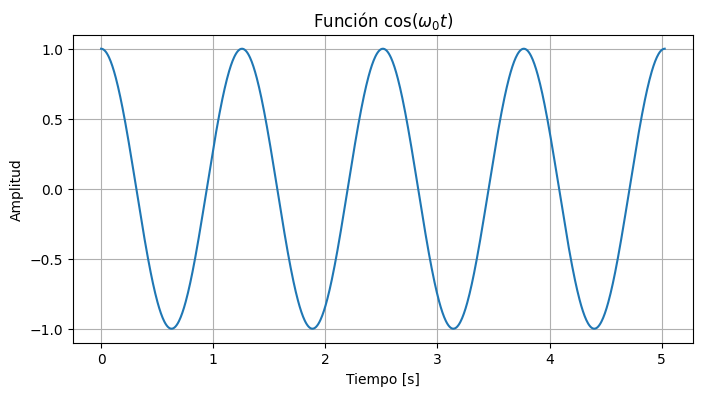

In [3]:
# Primero comenzaremos a nombrar a nuestros parámetros
omega_0 = 5  # Asignamos un valor fijo a la frecuencia de la función coseno
T = 2 * np.pi / omega_0  # Periodo
N = 1000  # Número de puntos
t = np.linspace(0, 4 * T, N)  # Tiempo

# Después, procedemos a definir a nuestra función coseno
f_t = np.cos(omega_0 * t)

# Finalmente, graficamos la señal original
plt.figure(figsize=(8, 4)) #Estas son las dimensiones de nuestra gráfica
plt.plot(t, f_t)
plt.title(r'Función $\cos(\omega_0 t)$', loc="center")#Titulo de la gráfica
plt.xlabel('Tiempo [s]')#Nombre eje horizontal
plt.ylabel('Amplitud')#Nombre eje vertical
plt.yticks(np.arange(-1, 1.5, 0.5))# Esto es para ajustar las divisiones del eje vertical, tal que tome valores de 0.5 en 0.5
plt.grid(True)
plt.show()


Ahora, es necesario hacer una interpretación del resultado que se obtuvo al aplicar la transformada de Fourier.

Tenemos que nuestro resultado está compuesto por la suma de dos funciones delta de Dirac, donde cabe mencionar que esa función tiene la siguiente propiedad:
$$
\delta(k - k') = \left\{ \begin{matrix}
			0, \quad\text{si } k\neq k'\\
			\infty, \quad\text{si } k = k'\\
		\end{matrix}\right.
$$

En nuestro caso, obtuvimos que

$$
F(\omega) = \pi \left[ \delta(\omega - \omega_0) + \delta(\omega + \omega_0) \right]
$$

De donde podemos observar que, para los valores de frecuencia $\omega = \omega_0$ y $\omega = -\omega_0$, nuestra función $F(\omega)$ toma valores infinitamente grandes. Por lo tanto, esto lo podemos interpretar como que nuestra señal original está formada únicamente por estas dos frecuencias bien definidas.

A continuación, se creará un gráfico donde segun el valor que elijamos de $\omega_0$, se mostrará dónde están ubicados esos picos

In [5]:
# Con el fin de hacer un gráfico interactivo, crearemos un Slider para elegir un valor de omega_0

slider = widgets.IntSlider(min=1, max=8, step=1, description='ω') #Int.Slider nos devuelve un un valor entero para omega_0

# Necesitamos crear una función que conecte a nuestra grafica con el valor elegido para el slider
def Transformada(omega_0):
    omega_0 = int(omega_0)  # Aseguramos que el valor elegido sea de tipo entero
    omega = np.linspace(-10, 10, 1000)  # Dominio de las frecuencias

    # Se construirá una función que represente la TF (dos picos en omega_0 y -omega_0)
    TF = np.zeros_like(omega)  # Arreglo de ceros para valores del dominio distintos a omega_0
    TF[np.abs(omega - omega_0) < 0.1] = 10  # Pico en omega_0. 
    TF[np.abs(omega + omega_0) < 0.1] = 10  # Pico en -omega_0

    # Por último, se grafica nuestra TF
    plt.figure(figsize=(8, 4))
    plt.plot(omega, TF)
    plt.title(r'Transformada de Fourier de $\cos(\omega_0 t)$', loc='center')
    plt.xlabel('Frecuencia $\omega$ [rad/s]')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.xticks(np.arange(-10, 11, 1))  # Divisiones en el eje X (frecuencia)

    plt.show()

# Finalmente, proyectamos un Widget para que elegir manualmente el valor deseado
widgets.interact(Transformada, omega_0=slider)


interactive(children=(IntSlider(value=1, description='ω', max=8, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.Transformada(omega_0)>

## Visualización completa del resultado.

Para poder entender mejor nuestro resultado, será de mucha ayuda elaborar un gráfico que contenga toda esta información, es decir, necesitamos crear algo que nos permita ver cómo nuestra función original puede ser descompuesta en sus respectivas componentes para cada frecuencia permitida.

Además, también será de ayuda representar dichas componentes como picos en el dominio de las frecuencias, ya que esto nos dará el resultado gráfico de la tranformada de Fourier.   

Para poder elaborar esa representación gráfica, recordemos que $\cos(\omega_0 t)$ puede ser expresado de la siguiente forma:

$$\cos(\omega_0 t) = \frac{e^{i\omega_0 t}}{2} + \frac{e^{-i\omega_0 t}}{2} \tag{4}$$

Esto nos dice que nuestra función original se puede expresar como la suma de dos componentes, una con frecuencia $\omega_0$ y otra con frecuencia $-\omega_0$ (tal y como lo indicó la transformada de Fourier). 

Si usamos la identidad de Euler en $\mathbf{(4)}$, nos encontramos con lo siguiente:

$$\cos(\omega_0 t) = \frac{1}{2}(cos(\omega_0 t) + i\sin(\omega_0 t)) + \frac{1}{2}(cos(\omega_0 t) - i\sin(\omega_0 t))$$

Podemos notar que las componentes imaginarias se anulan entre sí, y por tanto, el resultado estará dado por la suma de las respectivas partes reales. Es decir:

$$\cos(\omega_0 t) = Re\left(\frac{e^{i\omega_0 t}}{2}\right) + Re\left(\frac{e^{-i\omega_0 t}}{2}\right)$$

Por lo tanto debemos de graficar esas componentes reales.

Para que nuestras gráficas no queden encimadas en el plano Tiempo-Amplitud, se creará un nuevo eje perpendicular a ese plano, cuyo dominio sea el de las frecuencias. Esto nos permitirá colocar cada compomente sinusoidal a lo largo de este nuevo eje en su respectiva frecuencia .

Posteriormente, podemos indicar, a través de picos, en el plano Frecuencia-Amplitud en qué valores de $\omega$ hay una componente sinusoidal, es decir, en ese plano recrearemos la gráfica de la transformada de Fourier de $\cos(\omega_0 t)$.

In [6]:
#Creamos un nuevo slider
slider2 = widgets.IntSlider(min=1, max=5, step=1, description='ω')

#Definimos la funcion que conectara con el slider

def Grafico_completo(omega_0):

# Comenzaremos creando nuestro espacio en tres dimensiones
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
# Procedemos a crear el rango de tiempo de t = 0 a t = 4pi y definiendo la frecuencia--------------------------------------------------------

    t = np.linspace(0, 4 * np.pi, 500)
    omega_0 = int(omega_0)

#Estos son los ejes cartesianos, que servirán como apoyo visual-------------------------------------------------------------------------------------------

    ax.plot([0,4*np.pi], [0, 0], [0, 0], color='k')  # Eje de t
    ax.plot([0, 0], [-6, 6], [0, 0], color='k')  # Eje de frecuencias
    ax.plot([0, 0], [0, 0], [-2, +2], color='k')  # Eje de amplitud

#Establecemos los limites de 2esos ejes, tal que cuadren con nuestro espacio 3D----------------------------------------------------------------------------

    ax.set_xlim([0, 4*np.pi])
    ax.set_ylim([-6, 6])
    ax.set_zlim([-2,+2])

# Después, se definirán las funciones exponenciales que crean a coseno-----------------------------------------------------------------------------------

    f1 = np.exp(1j * omega_0 * t) / 2
    f2 = np.exp(-1j * omega_0 * t) / 2

# Como se mostró en el desarrollo, sólo se ocupará la parte real de f1 y f2 (se hará uso de np.real())------------------------------------------------------
    onda1 = np.real(f1)
    onda2 = np.real(f2)

# Posteriormente, se definirá a coseno como la suma de esas dos ondas.------------------------------------------------------------------------------------
    coseno = onda1 + onda2

# Aquí se creará un nuevo eje, perpendicular al plano donde vive la gráfica de coseno. Este eje representará el dominio de las frecuencias.----------------
#np.full_like es para que el nuevo eje sea del mismo tamaño que el eje del tiempo, pero que solo contenga un valor especificado
    masomega = np.full_like(t, omega_0) #+\omega_0
    menosomega = np.full_like(t, -omega_0) #-\omega_0

# De esta forma, ya pueden ser graficada la función coseno, así como sus componentes sinusoidales.
#Las entradas de nuestras gráficas en 3D son (tiempo, frecuencia, f(t))

    ax.plot(t, np.zeros_like(t), coseno, 'g', label=r'$\cos(\omega_0 t)$')

    ax.plot(t, masomega, onda1, 'y', label=r'$Re\left(\frac{e^{i\omega_0 t}}{2}\right)$')

    ax.plot(t, menosomega, onda2, 'b', label=r'$Re\left(\frac{e^{-i\omega_0 t}}{2}\right)$')

# Finalizaremos recreando un grafico de la transformada de Fourier.
#El gráfico consistirá en colocar picos en el plano Frecuencia-Amplitud para aquellos valores de frecuencia donde fue colocada la correspondiente componente del coseno.

    ax.plot(np.zeros_like(t), masomega, np.linspace(0,2, len(t)), 'r--', label='Transformada de Fourier')
    ax.plot(np.zeros_like(t), menosomega, np.linspace(0,2, len(t)), 'r--')

    ax.legend()#Etiquetas

# Finalmente, nombraremos a nuestros ejes y daremos un título a nuestra gráfica
    plt.title(r'Descomposición de $\cos(\omega_0 t)$ en sus componentes sinusoidales', loc="center")
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Frecuencia')
    ax.set_zlabel('Amplitud')
    plt.grid("True")

    plt.show()

#Imprimimos el widget
widgets.interact(Grafico_completo, omega_0=slider2)

interactive(children=(IntSlider(value=1, description='ω', max=5, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.Grafico_completo(omega_0)>

## Ejemplo de aplicación de la transformada de Fourier

En ingeniería de telecomunicaciones, las señales (como el sonido, las ondas de radio o las imágenes) se analizan utilizando la transformada de Fourier para identificar y filtrar componentes de frecuencia.

Cuando una señal es enviada por un canal de comunicación, esta generalmente se distorsiona por el ruido o por interferencias externas. Por lo tanto, para poder analizar cómo fue el cambio de la señal, es necesario descomponerla en sus componentes de frecuencia. Es aquí donde entra la transformada de Fourier.

A continuación se mostrará un video corto donde explica cómo son estudiadas las señales a través del dominio de las frecuencias.

In [51]:
#Comando para poder colocar un video de YouTube en una celda.
display(HTML('<iframe width="600" height="300" src="https://www.youtube.com/embed/ikEnKdkWUGk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'))